In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GPy
import GPyOpt
import sys
from matplotlib.collections import EllipseCollection

%matplotlib inline

In [2]:
observations = pd.read_csv('observations/observations.csv')

In [3]:
observations.tail(10)

,pitch,yoffset_layer,yoffset_plane,zshift_layer,zshift_plane,zshift_view,alpha,reconstructible,reco_passed_no_clones
1610,3.6,1.8,0.900000,1.000000,12.000000,10.000000,8.374288,169.0,164.0
1611,3.6,1.8,0.900000,1.000000,12.000000,10.000000,12.898512,146.0,144.0
1612,3.6,1.8,0.900000,1.000000,7.848115,12.000000,15.000000,173.0,168.0
1613,3.6,1.8,0.900000,1.233278,8.040339,11.133969,7.566286,160.0,157.0
1614,3.6,1.8,1.768691,1.727580,4.833175,10.566780,13.716033,156.0,153.0
1615,3.6,1.8,2.384888,2.410366,6.422656,10.000000,6.547389,162.0,155.0
1616,3.6,1.8,0.900000,1.000000,8.739767,10.000000,10.868873,160.0,156.0
1617,3.6,1.8,0.900000,3.591697,6.047118,12.000000,6.530585,135.0,134.0
1618,3.6,1.8,4.500000,1.341527,5.765610,10.000000,5.000000,172.0,168.0
1619,3.6,1.8,1.092567,2.423684,2.791100,11.756037,10.236167,152.0,146.0


In [187]:
observations['objective'] = observations['reco_passed_no_clones'] / 500

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text yticklabel objects>)

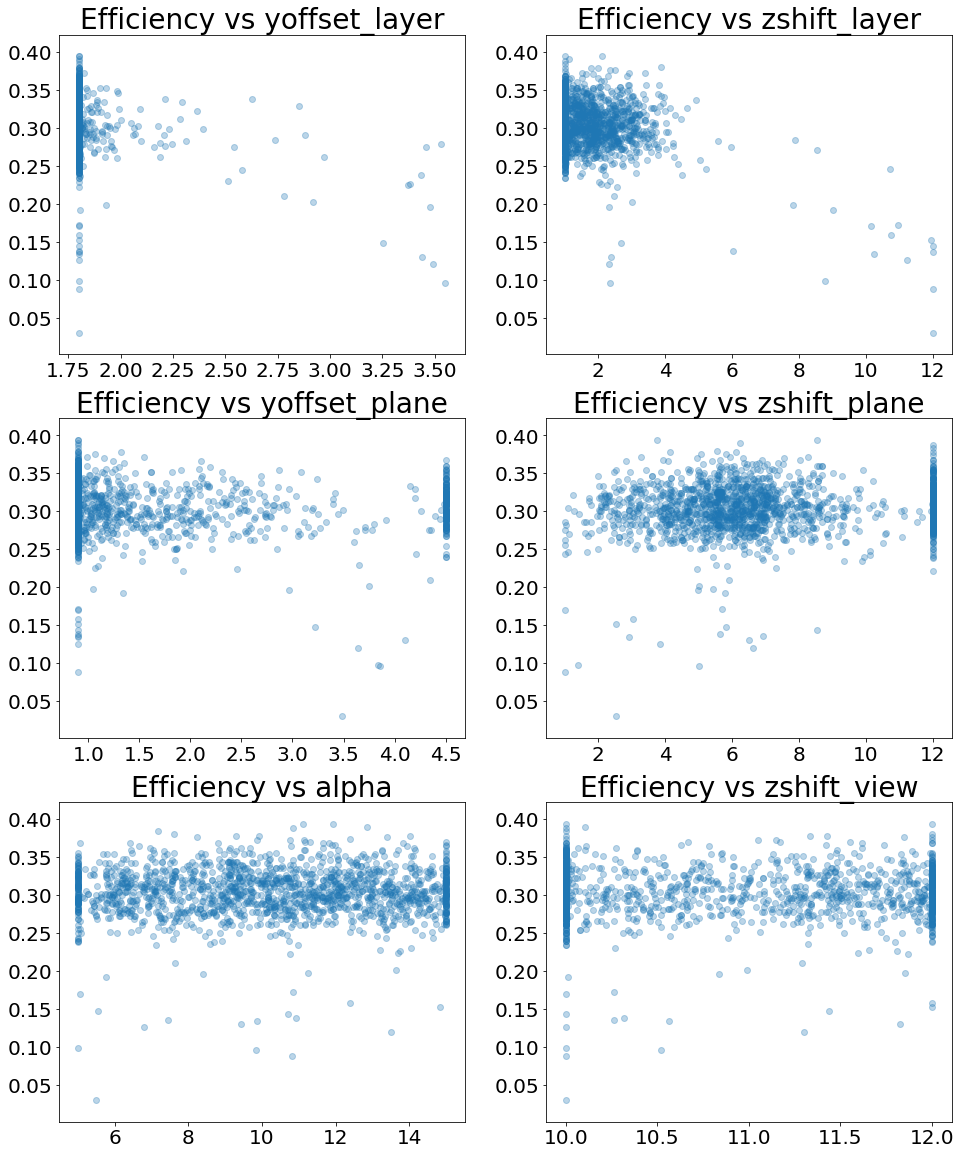

In [210]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 1)
plt.title('Efficiency vs yoffset_layer', fontsize=28)
plt.scatter(observations.yoffset_layer[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 2)
plt.title('Efficiency vs zshift_layer', fontsize=28)
plt.scatter(observations.zshift_layer[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 3)
plt.title('Efficiency vs yoffset_plane', fontsize=28)
plt.scatter(observations.yoffset_plane[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 4)
plt.title('Efficiency vs zshift_plane', fontsize=28)
plt.scatter(observations.zshift_plane[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 5)
plt.title('Efficiency vs alpha', fontsize=28)
plt.scatter(observations.alpha[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 6)
plt.title('Efficiency vs zshift_view', fontsize=28)
plt.scatter(observations.zshift_view[:], observations.objective[:], alpha=0.3)
plt.xticks(np.linspace(10, 12, 5), fontsize=20)
plt.yticks(fontsize=20)

In [209]:
np.linspace(10, 12, 5)

array([10. , 10.5, 11. , 11.5, 12. ])

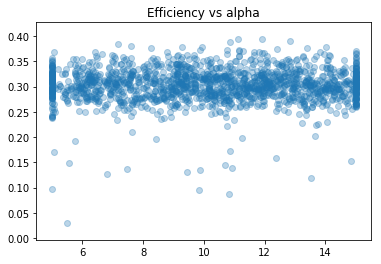

In [189]:
plt.title('Efficiency vs alpha')
plt.scatter(observations.alpha[:], observations.objective[:], alpha=0.3)

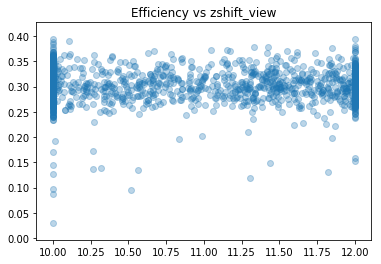

In [190]:
plt.title('Efficiency vs zshift_view')
plt.scatter(observations.zshift_view[:], observations.objective[:], alpha=0.3)

In [96]:
def plot_view(x, length=5):
    
    plt.figure(figsize=(9, 16))
    pitch, yoffset_layer, yoffset_plane, zshift_layer, zshift_plane, zshift_view, alpha = x
    radius = 43.
    for plane in [0, 1]:
        for layer in [0, 1]:
            
            zs = np.array([zshift_layer * layer + zshift_plane * plane] * length)
            ys = np.cumsum([pitch] * length) - pitch + yoffset_layer * layer + yoffset_plane * plane
            plt.scatter(zs, ys, s=np.pi * radius**2, facecolor='none', edgecolors='blue')
#     plt.scatter([0], [0.5], color='red')
#     plt.scatter([0], [0], color='green')
    plt.scatter([-0.5], [-0.5], color='white')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis("off")
    plt.show()

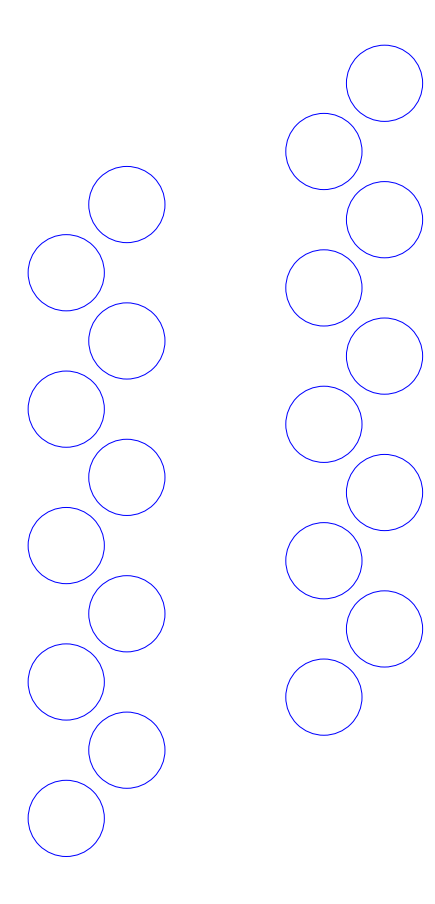

In [97]:
plot_view([  3.6       ,   1.8       ,   3.2,   1.6       ,
         6.8       ,  10.        ,   5.        ])

# Repeat Daniel pics

Fit GP model:

In [85]:
design = observations.dropna()[observations.columns[:-3]].values
#because we want to maximize
answers = -observations.dropna()[observations.columns[-1:]].values

kernel = GPy.kern.RBF(input_dim=7)
m = GPy.models.GPRegression(design, answers, kernel)

In [49]:
m.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s18  0003  -1.009837e+02   2.014573e+04 
    01s39  0019  -5.060406e+02   2.400839e-09 
Runtime:     01s39
Optimization status: Converged



In [50]:
values = m.predict(design)

In [51]:
arm = np.array(values)[0].argmin()
arm

346

In [52]:
m.predict_noiseless(design[arm].reshape(1, -1))

(array([[-0.99420569]]), array([[0.00010817]]))

In [53]:
print(values[0][arm], values[1][arm])

[-0.99420569] [0.00163806]


In [54]:
design[arm]

array([ 3.6       ,  1.8       ,  0.90848284,  1.71424461,  4.7115061 ,
       12.34191452,  5.        ])

Fit GGPM model:

In [98]:
design = observations.dropna()[observations.columns[:-3]].values
trials = np.array([[500]] * len(design))
y = observations.dropna()[['reco_passed_no_clones']].values

kernel = GPy.kern.RBF(input_dim=7)
ggpm = GPy.core.GP(design, y, kernel=kernel, 
                   Y_metadata={'trials': trials},
                   inference_method=GPy.inference.latent_function_inference.laplace.Laplace(),
                   likelihood=GPy.likelihoods.Binomial())

In [99]:
ggpm.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    13s75  0003   5.593116e+03   2.665260e+04 
    37s83  0010   5.423477e+03   5.764996e-01 
    49s17  0013   5.423377e+03   6.399568e-04 
 01m11s65  0019   5.423377e+03   6.001081e-06 
Runtime:  01m11s65
Optimization status: Converged



In [100]:
lik = GPy.likelihoods.Bernoulli()
values = lik.gp_link.transf(ggpm._raw_predict(design)[0])

In [101]:
arm = np.array(values).argmax()
arm

86

In [102]:
values[arm]

array([0.31820928])

In [103]:
design[arm]

array([ 3.6       ,  1.8       ,  4.5       ,  2.25398148,  4.98573016,
       10.        ,  5.        ])

In [182]:
pitch, yoffset_layer, yoffset_plane, zshift_layer, zshift_plane, zshift_view, alpha = design[arm]
    
cmd = "/opt/disney-run.sh python /opt/objective.py --pitch "+str(pitch)+" --yoffset_layer "+str(yoffset_layer)+\
    " --yoffset_plane "+str(yoffset_plane)+" --zshift_layer "+str(zshift_layer)+" --zshift_plane "+\
    str(zshift_plane)+" --zshift_view "+str(zshift_view)+" --alpha "+str(int(alpha))+\
    " --nEvents 5000 --method FH"

In [183]:
cmd

'/opt/disney-run.sh python /opt/objective.py --pitch 3.6 --yoffset_layer 1.8 --yoffset_plane 4.5 --zshift_layer 2.253981478412842 --zshift_plane 4.985730159628287 --zshift_view 10.0 --alpha 5 --nEvents 5000 --method FH'

In [162]:
df_tmp = pd.DataFrame(columns=observations.columns[1:7])
df_tmp.loc[0] = design[arm][1:]

In [163]:
df_tmp

,yoffset_layer,yoffset_plane,zshift_layer,zshift_plane,zshift_view,alpha
0,1.8,4.5,2.253981,4.98573,10.0,5.0


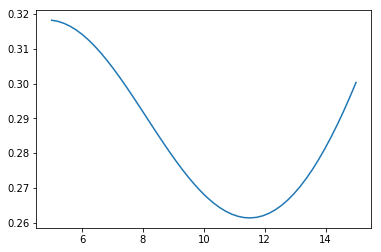

In [110]:
best_point = design[arm]
arr = np.array([best_point] * 50)
arr[:, -1] = np.linspace(5, 15, 50)
plt.plot(np.linspace(5, 15, 50), lik.gp_link.transf(ggpm._raw_predict(arr)[0]))

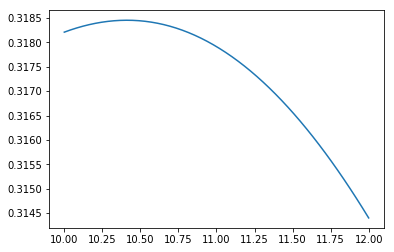

In [111]:
best_point = design[arm]
arr = np.array([best_point] * 50)
arr[:, -2] = np.linspace(10, 12, 50)
plt.plot(np.linspace(10, 12, 50), lik.gp_link.transf(ggpm._raw_predict(arr)[0]))

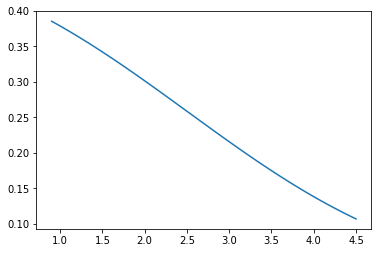

In [169]:
best_point = design[arm]
arr = np.array([best_point] * 50)
arr[:, 1] = np.linspace(0.9, 4.5, 50)
plt.plot(np.linspace(0.9, 4.5, 50), lik.gp_link.transf(ggpm._raw_predict(arr)[0]))

In [ ]:
best_point = design[arm]
arr = np.array([best_point] * 50)
arr[:, 1] = np.linspace(1.8, 3.6, 50)
plt.plot(np.linspace(1.8, 3.6, 50), lik.gp_link.transf(ggpm._raw_predict(arr)[0]))

In [171]:
best_point = design[arm]
arr = np.array([best_point] * 10000)
z_layer = np.linspace(np.sqrt(-(3.6-1.8)**2+2**2), 3, 100)
z_plane = np.linspace(2.9,7.1, 100)
z_layer, z_plane = np.meshgrid(z_layer, z_plane)
grid = np.dstack([z_layer, z_plane]).reshape(10000, 2)
arr[:, 3:5] = grid

In [146]:
argmax = np.argmax(lik.gp_link.transf(ggpm._raw_predict(arr)[0]))
best_point = arr[argmax][3:5]

In [154]:
lik.gp_link.transf(ggpm._raw_predict(arr[argmax].reshape(1, -1))[0])

array([[0.31922753]])

In [159]:
lik.gp_link.transf(ggpm._raw_predict(best_point.reshape(1, -1))[0])

array([[0.31820928]])

Text(0.5,1,'Ratio of reconstructed events')

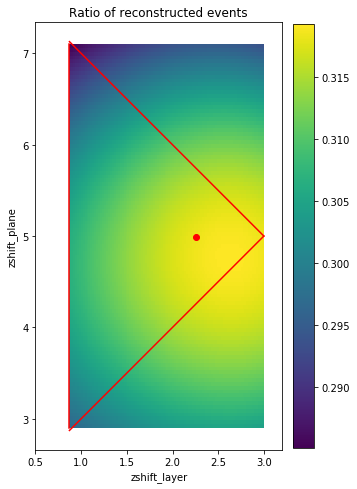

In [178]:
plt.figure(figsize=(5, 10))
pic = plt.imshow(lik.gp_link.transf(ggpm._raw_predict(arr)[0]).reshape(100, 100), extent=[np.sqrt(-(3.6-1.8)**2+2**2), 3,\
                                                                                    2.9, 7.1])
plt.plot(np.array([np.sqrt(-(3.6-1.8)**2+2**2),3]), np.array([np.sqrt(-(3.6-1.8)**2+2**2),3])+2, c='red')
plt.plot(np.array([np.sqrt(-(3.6-1.8)**2+2**2),3]), -np.array([np.sqrt(-(3.6-1.8)**2+2**2),3])+8, c='red')
plt.plot(np.array([np.sqrt(-(3.6-1.8)**2+2**2),np.sqrt(-(3.6-1.8)**2+2**2)]), [2.9,7.1], c='red')
plt.colorbar(pic, fraction=0.076, pad=0.04)
plt.xlim([0.5, 3.2])
plt.scatter([2.25398148], [4.98573016], c='red')
plt.xlabel('zshift_layer')
plt.ylabel('zshift_plane')
plt.title('Ratio of reconstructed events')
# plt.scatter([best_point[0]], [best_point[1]], c='blue')

In [128]:
# np.sqrt(-(3.6-1.8)**2+2**2)<z_layer
# np.sqrt(-(1.8-4.5)**2+2**2)+z_plane<z_layer
# z_plane+z_layer<10-2
# z_layer<z_plane-2